# Machine Learning Linear Regression Project: Predicting Home Prices in Delhi
## Harsh (20058570011)

Dataset is Downloaded from here :- https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia/code

# Libraries importing

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Cleaning 

In [ ]:
df1 = pd.read_csv("/content/Delhi_v2.csv")
df1.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [ ]:
df1.shape

(7738, 18)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [ ]:
df1['Status'].unique()

array(['Under Construction', 'Ready to Move', nan], dtype=object)

In [ ]:
df1['Status'].value_counts()

Ready to Move         7148
Under Construction      16
Name: Status, dtype: int64

In [ ]:
df2 = df1.drop(['Unnamed: 0','latitude', 'longitude','Balcony', 'Status', 'neworold', 'parking','Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc'],axis='columns')
df2.shape

(7738, 6)

In [ ]:
df2.isnull().sum()

price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
Price_sqft    0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
Price_sqft    0
dtype: int64

In [ ]:
df3['bhk'] = df3['Bedrooms'].astype(int)
df3.bhk.unique()


array([ 3,  4,  2,  5,  6, 10,  7,  8,  9])

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['area'].apply(is_float)].head(10)

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df4 = df3.copy()
df4.head(2)

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,3
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,3


In [ ]:
df4.loc[30]

price                                                 9000000.0
Address       sector 103 gurgaon, Dwarka Expressway, Gurgaon...
area                                                     1481.0
Bedrooms                                                    2.0
Bathrooms                                                   2.0
Price_sqft                                          6076.975017
bhk                                                           2
Name: 30, dtype: object

In [ ]:
df4_stats = df4['Price_sqft'].describe()
df4_stats

count     7738.000000
mean      5543.660241
std       2408.659307
min       2100.000000
25%       3950.986915
50%       4972.674332
75%       6350.638693
max      44378.698225
Name: Price_sqft, dtype: float64

In [ ]:
df4.Address = df4.Address.apply(lambda x: x.strip())
Address_stats = df4['Address'].value_counts(ascending=False)
Address_stats

Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                                1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR      1
Rajnagar Extension Gahziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR         1
Rajendra Park, Rajendra Park, Gurgaon, Delhi NCR                                1
sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR             1
Name: Address, Length: 4145, dtype: int64

In [ ]:
Address_stats.values.sum()

7738

In [ ]:
len(Address_stats[Address_stats>10])

89

In [ ]:
len(Address_stats)

4145

In [ ]:
len(Address_stats[Address_stats<=10])

4056

In [ ]:
location_stats_less_than_10 = Address_stats[Address_stats<=10]
location_stats_less_than_10

Surajpur, Greater Noida, Delhi NCR                                            10
Sector 21C, Faridabad, Delhi NCR                                              10
Sector 107, Gurgaon, Delhi NCR                                                10
Sector 90, Gurgaon, Delhi NCR                                                 10
Sector 79, Noida, Delhi NCR                                                   10
                                                                              ..
e block sector 57, Sector 57, Gurgaon, Delhi NCR                               1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR     1
Rajnagar Extension Gahziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR        1
Rajendra Park, Rajendra Park, Gurgaon, Delhi NCR                               1
sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR            1
Name: Address, Length: 4056, dtype: int64

In [ ]:
len(df4.Address.unique())

4145

In [ ]:
df4.Address = df4.Address.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.Address.unique())

90

In [ ]:
df4.head(10)

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,4148.148148,3
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,5906.040268,3
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,6918.238994,4
3,3810000.0,other,1050.0,2.0,2.0,3628.571429,2
4,6200000.0,other,1350.0,2.0,2.0,4592.592593,2
5,3700000.0,other,1150.0,2.0,2.0,3217.391304,2
6,3270000.0,other,890.0,2.0,2.0,3674.157303,2
7,3990000.0,other,850.0,2.0,2.0,4694.117647,2
8,3500000.0,other,960.0,2.0,2.0,3645.833333,2
9,5500000.0,other,1400.0,3.0,3.0,3928.571429,3


In [ ]:
df4[df4.area/df4.bhk<300].head()

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
10,7300000.0,other,850.0,3.0,2.0,8588.235294,3
42,2400000.0,other,540.0,2.0,2.0,4444.444444,2
47,4800000.0,other,1232.0,6.0,3.0,3896.103896,6
114,7000000.0,other,559.0,2.0,2.0,12522.361360,2
117,2630000.0,other,750.0,3.0,2.0,3506.666667,3


In [ ]:
df6 = df4[~(df4.area/df4.bhk<300)]
df6.shape

(7451, 7)

In [ ]:
df6.Price_sqft.describe()

count     7451.000000
mean      5498.470996
std       2259.931840
min       2100.000000
25%       3923.260950
50%       4948.453608
75%       6321.784150
max      25925.925926
Name: Price_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Address'):
        m = np.mean(subdf.Price_sqft)
        st = np.std(subdf.Price_sqft)
        reduced_df = subdf[(subdf.Price_sqft>(m-st)) & (subdf.Price_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(5530, 7)

In [ ]:
def plot_scatter_chart(df,Address):
    bhk2 = df[(df.Address==Address) & (df.bhk==2)]
    bhk3 = df[(df.Address==Address) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Price_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Price_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Address	)
    plt.legend()

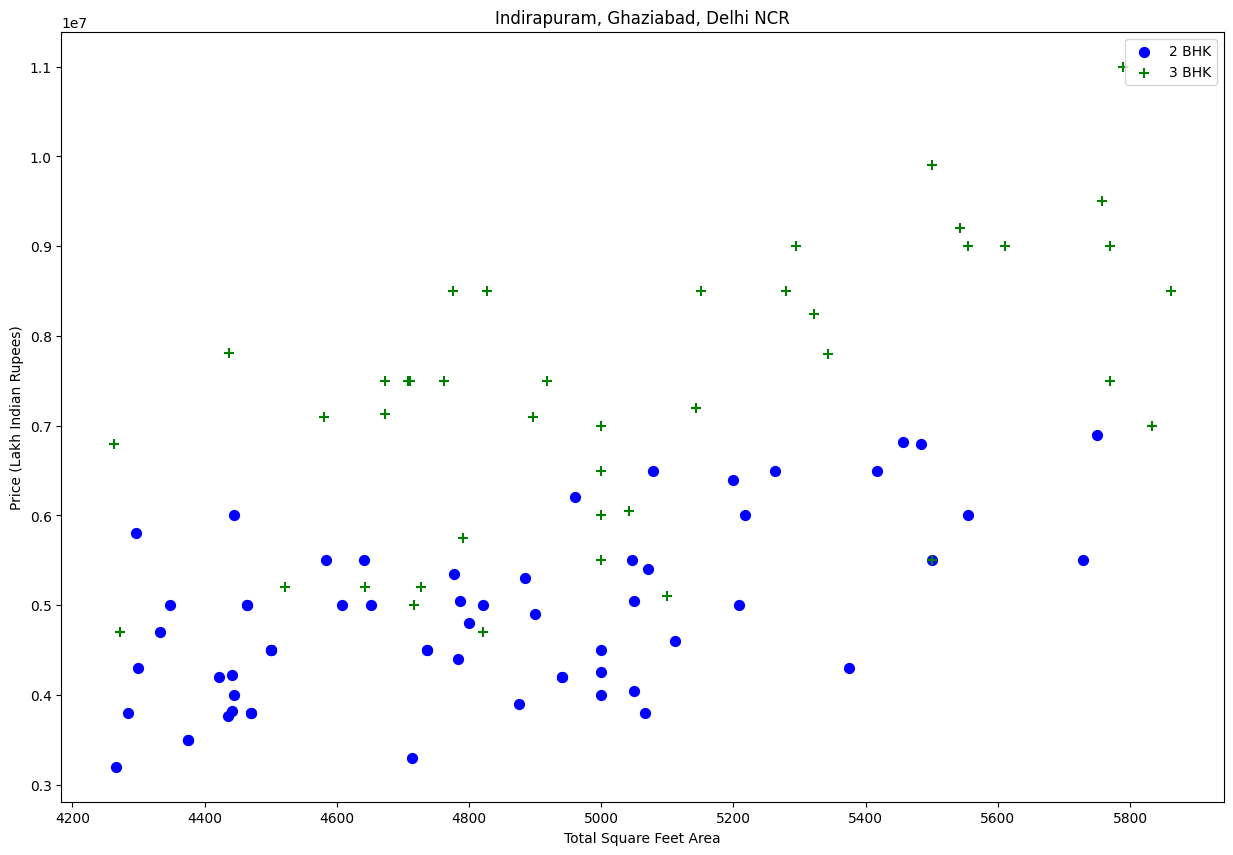

In [ ]:
plot_scatter_chart(df7,"Indirapuram, Ghaziabad, Delhi NCR")

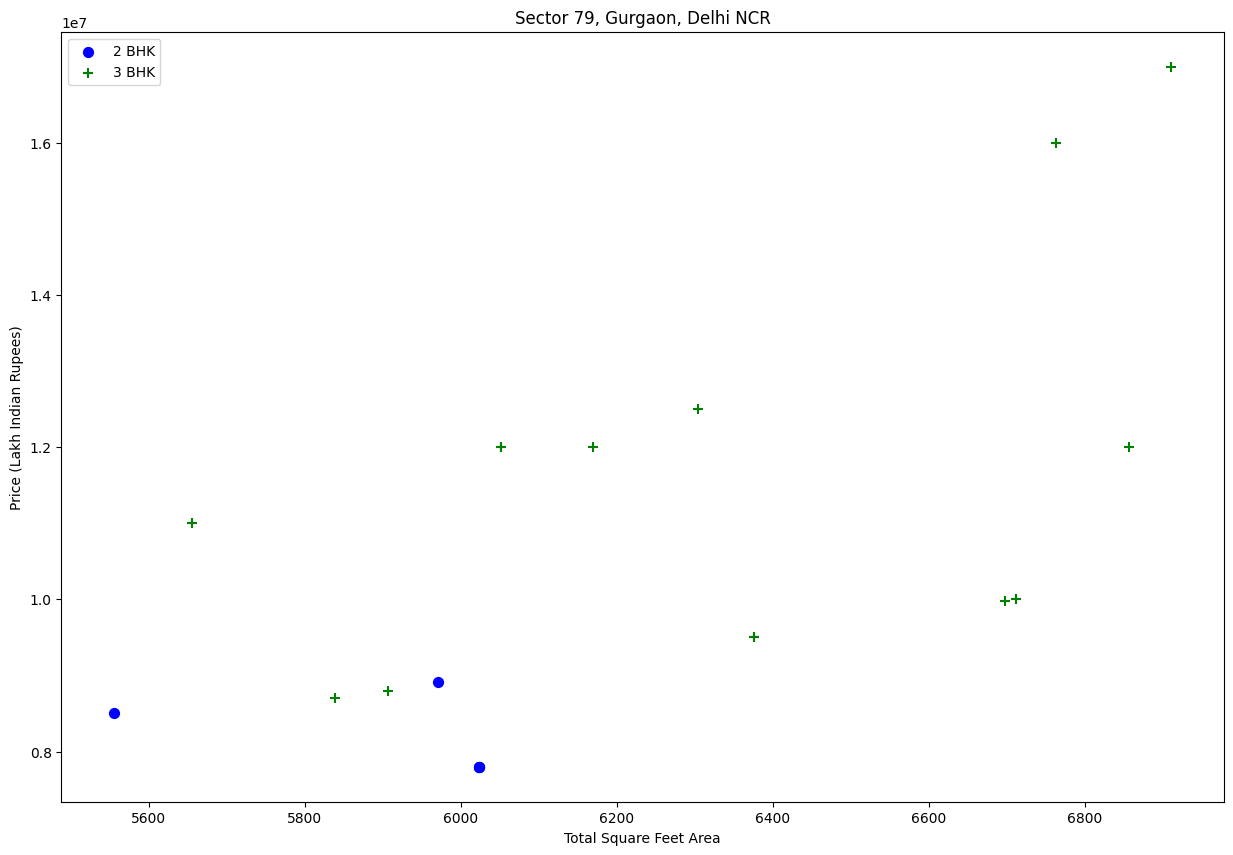

In [ ]:
plot_scatter_chart(df7,"Sector 79, Gurgaon, Delhi NCR")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Address, Address_df in df.groupby('Address'):
        bhk_stats = {}
        for bhk, bhk_df in Address_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_sqft),
                'std': np.std(bhk_df.Price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in Address_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(4404, 7)

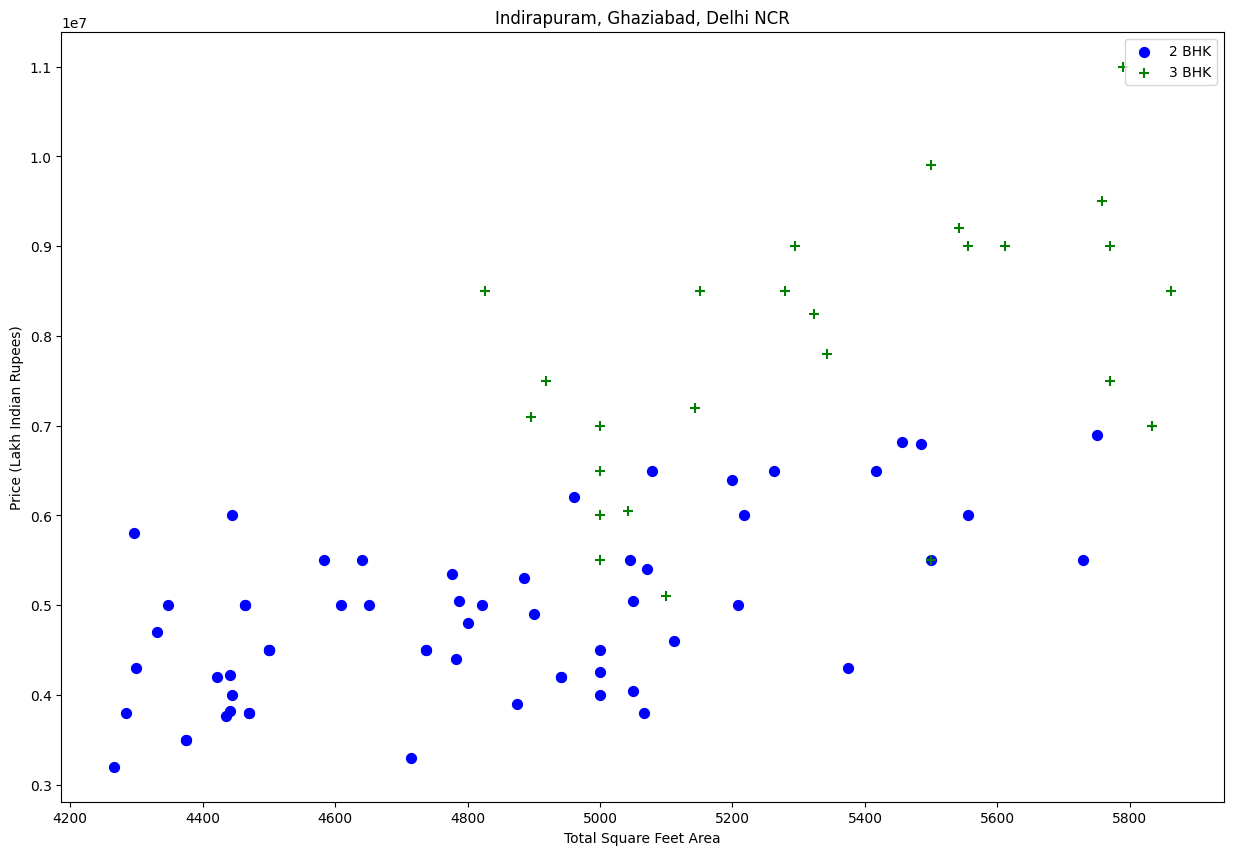

In [ ]:
plot_scatter_chart(df8,"Indirapuram, Ghaziabad, Delhi NCR")

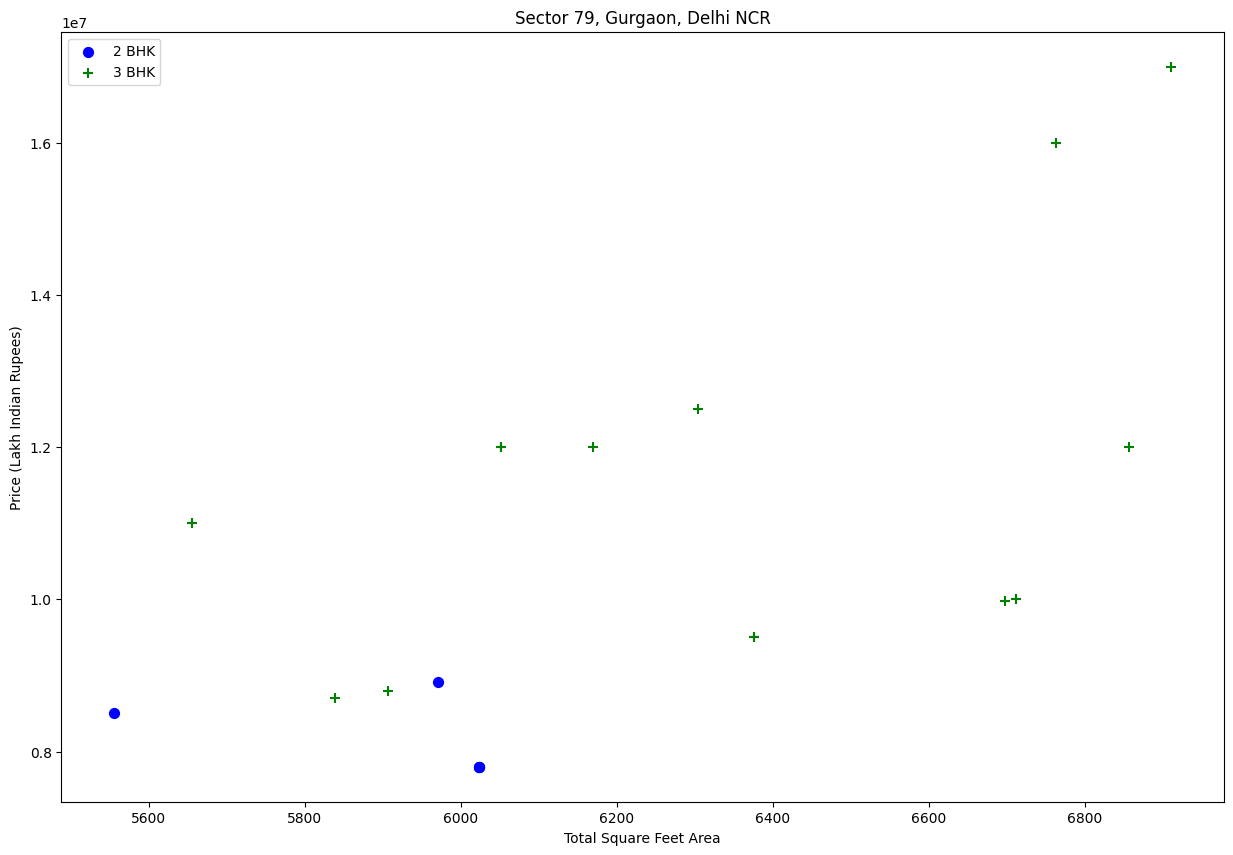

In [ ]:
plot_scatter_chart(df8,"Sector 79, Gurgaon, Delhi NCR")

Text(0, 0.5, 'Count')

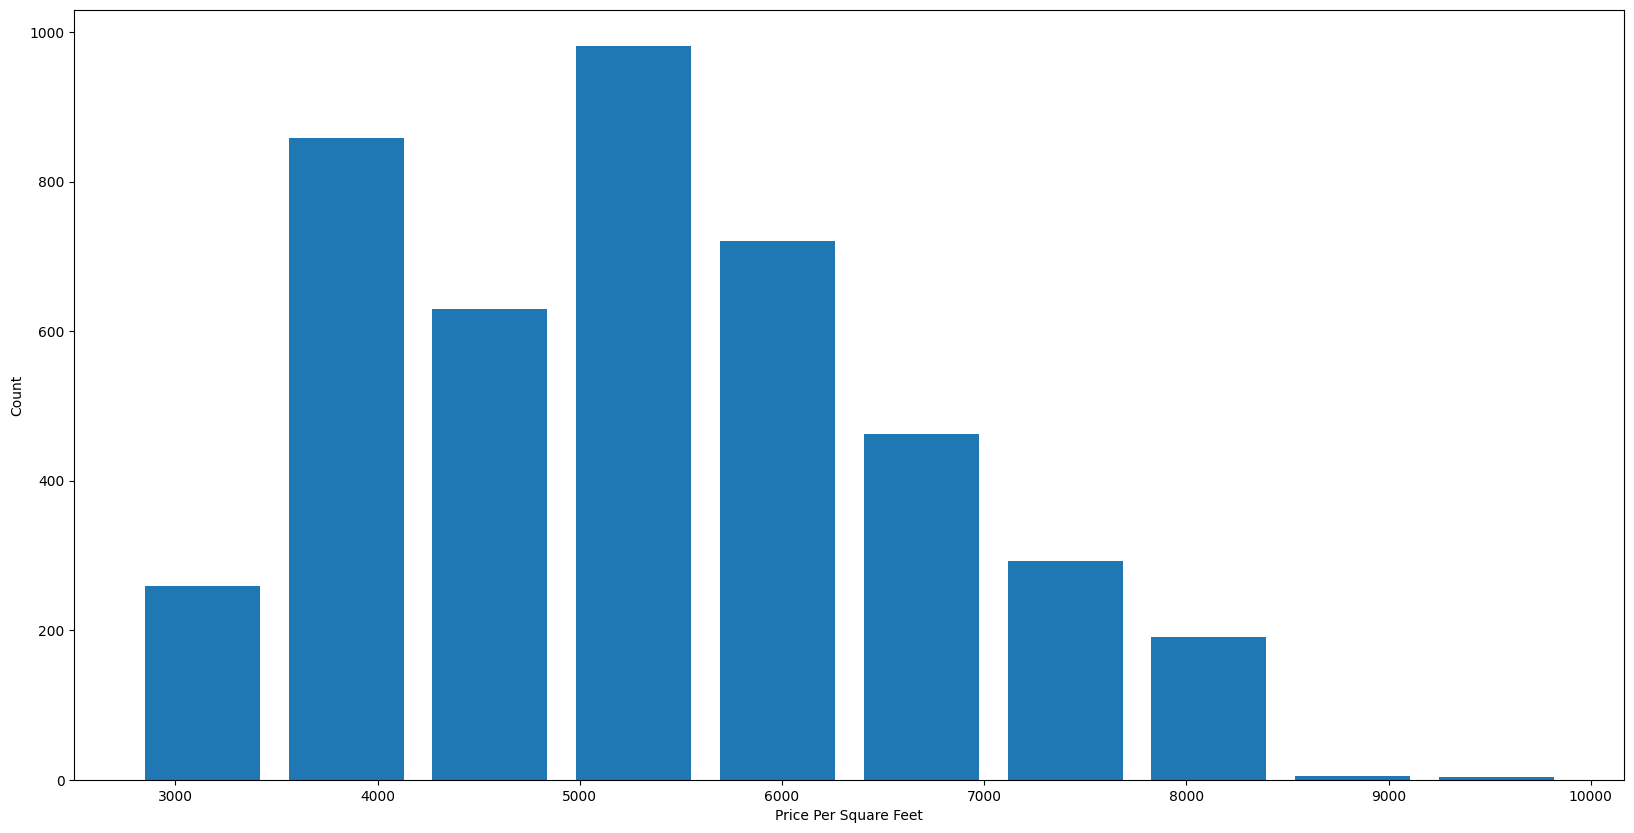

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.Price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.Bathrooms.unique()

array([ 2.,  3.,  4.,  5.,  8.,  6., 10.,  7.,  9.])

Text(0, 0.5, 'Count')

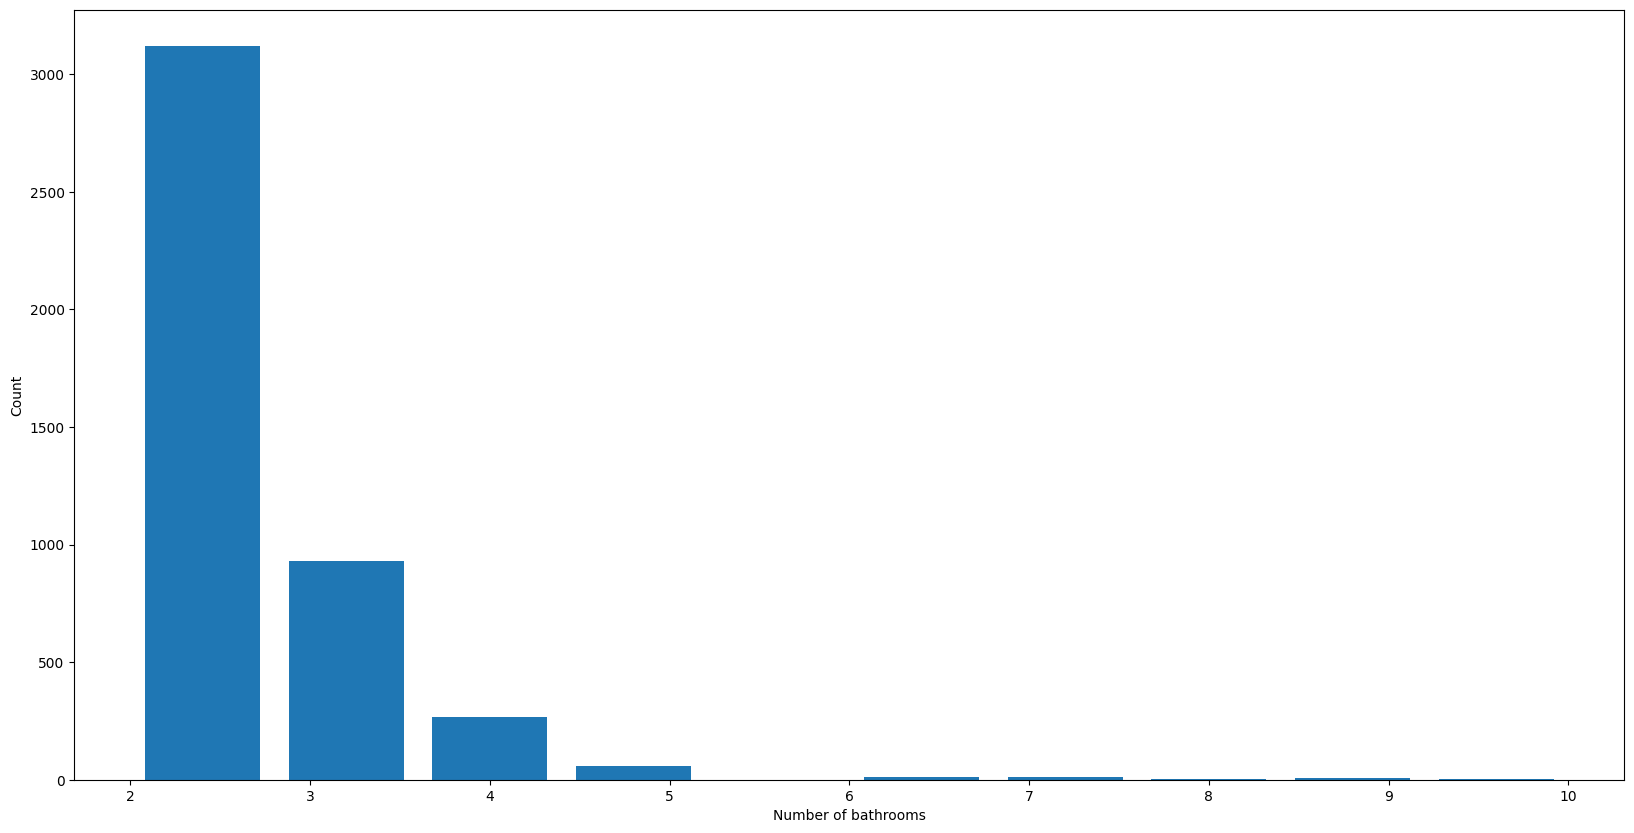

In [ ]:
plt.hist(df8.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.Bathrooms>7]

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
994,40000000.0,"Sector 67, Gurgaon, Delhi NCR",6000.0,5.0,8.0,6666.666667,5
1518,45000000.0,other,9000.0,10.0,10.0,5000.000000,10
2454,25000000.0,other,3744.0,10.0,8.0,6677.350427,10
2662,25000000.0,other,3400.0,7.0,8.0,7352.941176,7
3016,35000000.0,other,5200.0,5.0,9.0,6730.769231,5
3060,42500000.0,other,5400.0,8.0,8.0,7870.370370,8
3062,45000000.0,other,6800.0,9.0,9.0,6617.647059,9
3185,41000000.0,other,6500.0,9.0,9.0,6307.692308,9
3258,45000000.0,other,6500.0,9.0,9.0,6923.076923,9
4984,21500000.0,other,3550.0,9.0,9.0,6056.338028,9


In [ ]:
df8[df8.Bathrooms>df8.bhk+2]

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
994,40000000.0,"Sector 67, Gurgaon, Delhi NCR",6000.0,5.0,8.0,6666.666667,5
3016,35000000.0,other,5200.0,5.0,9.0,6730.769231,5
3110,14000000.0,other,2370.0,4.0,7.0,5907.172996,4
5183,18000000.0,other,2400.0,3.0,6.0,7500.000000,3


In [ ]:
df9 = df8[df8.Bathrooms<df8.bhk+2]
df9.shape

(4390, 7)

In [ ]:
df9.head(2)

,price,Address,area,Bedrooms,Bathrooms,Price_sqft,bhk
0,7000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1595.0,3.0,2.0,4388.714734,3
1,8000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,3.0,2.0,5161.290323,3


In [ ]:
df10 = df9.drop(['Bedrooms','Price_sqft'],axis='columns')
df10.head(3)

,price,Address,area,Bathrooms,bhk
0,7000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1595.0,2.0,3
1,8000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,2.0,3
2,4700000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1073.0,2.0,2


In [ ]:
dummies = pd.get_dummies(df10.Address)
dummies.head(3)

,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR","Eta 2, Greater Noida, Delhi NCR","Govindpuram, Ghaziabad, Delhi NCR","Greater Noida West, Greater Noida, Delhi NCR","Greater Noida West, Greater Noida, Greater Noida West, Greater Noida, Delhi NCR",...,"Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,price,Address,area,Bathrooms,bhk,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,7000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1595.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4700000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1073.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1550.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6000000.0,"Ahinsa Khand 2, Ghaziabad, Delhi NCR",1300.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('Address',axis='columns')
df12.head(2)

,price,area,Bathrooms,bhk,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,7000000.0,1595.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8000000.0,1550.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(4390, 93)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,area,Bathrooms,bhk,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR","Eta 2, Greater Noida, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,1595.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1550.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1073.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(4390, 92)

In [ ]:
y = df12.price
y.head(3)

0    7000000.0
1    8000000.0
2    4700000.0
Name: price, dtype: float64

In [ ]:
len(y)

4390

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9314642761302097

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92485704, 0.90975753, 0.9113656 , 0.90059606, 0.93709425])

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False],
                'copy_X': [True, False],
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Bhopura, Ghaziabad, Delhi NCR',1000, 2, 2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2756286.8986208187

In [ ]:
predict_price('Bhopura, Ghaziabad, Delhi NCR',1000, 3, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3323219.9966079434

In [ ]:
predict_price('Eta 2, Greater Noida, Delhi NCR',1000, 2, 2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2468623.8030523695

In [ ]:
predict_price('Eta 2, Greater Noida, Delhi NCR',1000, 3, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3035556.901039494

# Export location and column information to a file that will be useful later on in our prediction applicatio

In [ ]:
import joblib
with open('delhi_home_prices_model.joblib','wb') as f:
          joblib.dump(lr_clf, f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))